In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
stats = pd.read_csv("stats.csv")
print(f"\nWe will be analyzing the data of {stats.shape[0]} different pitchers")
print("\nBased this data, we will be predicting their salaries for 2018 Season")
stats.head()


We will be analyzing the data of 152 different pitchers

Based this data, we will be predicting their salaries for 2018 Season


,Player Name,Team Name,Wins,Losses,Saves,Hold,Blown Saves,Games,Games Started,Innings,...,HR/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,Salary(2018),Salary(2017)
0,Merrill Kelly,Wyverns,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,Henry Sosa,Twins,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,Hyun-Jong Yang,Tigers,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,Woo-Chan Cha,Twins,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,Brooks Raley,Giants,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [37]:
#The money value follows the following rule
# 1 = $10 -> 2700 = $27000
# The statistics are from a Korean website, so the US Dollar Conversion can be done by adding a single zero at the end.
stats["Salary(2018)"].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: Salary(2018), dtype: float64

<Axes: >

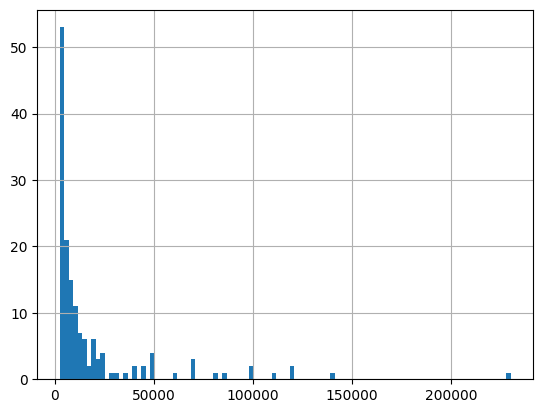

In [7]:
#Histogram of the salaries for players
stats["Salary(2018)"].hist(bins=100)

<Axes: >

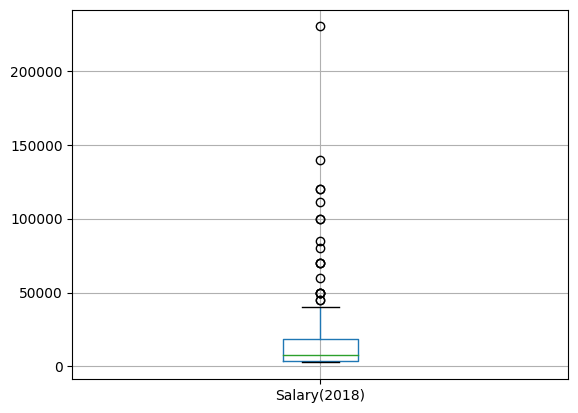

In [9]:
#boxplot of the salary data
stats.boxplot(column=['Salary(2018)'])

In [0]:
picher_df = stats[['Wins', 'Losses', 'Saves', 'Hold', 'Blown Saves', 'Games', 'Games Started', 'Innings', 'K/9',
       'BB/9', 'HR/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       'Salary(2018)', 'Salary(2017)']]

In [11]:
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

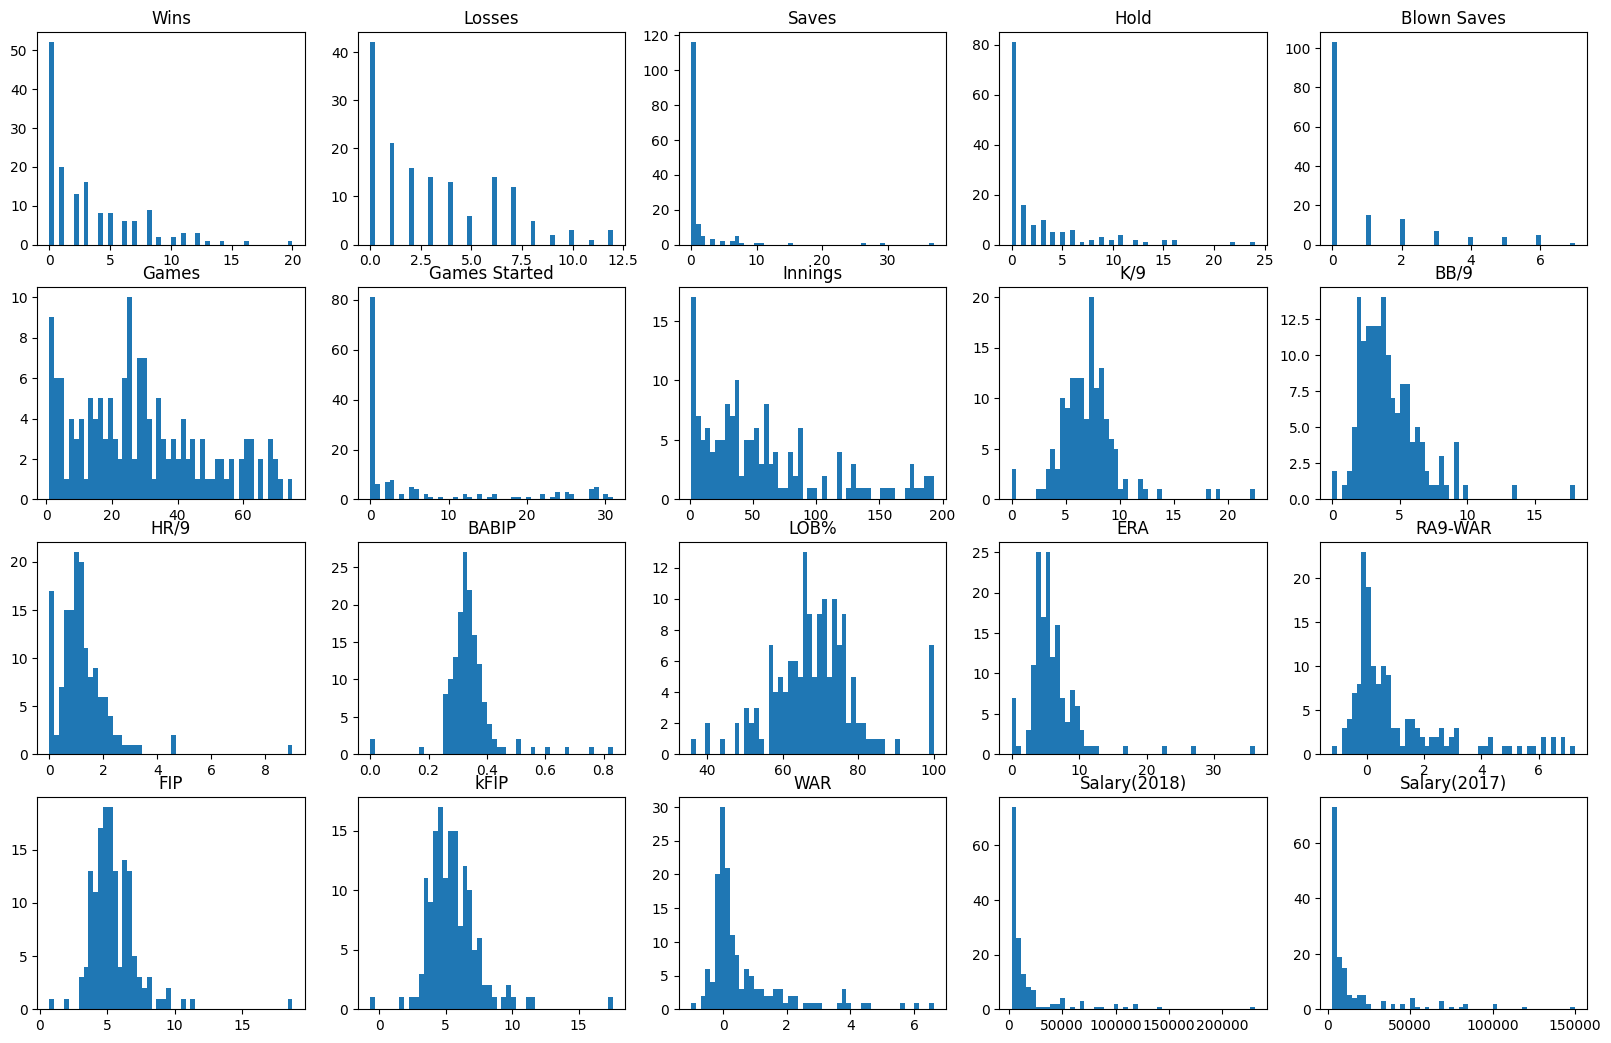

In [12]:
plot_hist_each_column(picher_df)